### Irakoze Irene
### Exploratory Data Analysis- Sports 

### Step 1: Reading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("Matches.csv")

In [4]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Step2: Extracting the data informations

In [5]:
# Checking the dataset size 
df.shape

(756, 18)

In [6]:
# chcking the dataset columns
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
# checking null values 
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
# Statistical data
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Step 3: Checking for dublicate values if possible drop those values

In [10]:
# Check duplicated values 
df.duplicated().sum()

0

In [11]:
# finding a unique number in dataset
df.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

### Step 4: Dropping Irrelevant Data

In [12]:
# Droppig  irrelevant values 
df.dropna(axis = 1).head()

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,venue
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,35,0,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,0,7,Maharashtra Cricket Association Stadium
2,3,2017,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,0,10,Saurashtra Cricket Association Stadium
3,4,2017,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,6,Holkar Cricket Stadium
4,5,2017,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,15,0,M Chinnaswamy Stadium


### Step5: Data visualizations

### How many Cricket Season?

In [13]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [14]:
len(df['season'].unique())


12

In [15]:
df['date']

0      2017-04-05
1      2017-04-06
2      2017-04-07
3      2017-04-08
4      2017-04-08
          ...    
751      05/05/19
752      07/05/19
753      08/05/19
754      10/05/19
755      12/05/19
Name: date, Length: 756, dtype: object

### Extract month and year from columns 

In [16]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [17]:
df[['date','year','month']].tail()

,date,year,month
751,05/05/19,2019,5
752,07/05/19,2019,7
753,08/05/19,2019,8
754,10/05/19,2019,10
755,12/05/19,2019,12


### year with the highest number of matches 

In [18]:
data=df['year'].value_counts()
data.iplot(kind='bar',xTitle='year', yTitle='No of matches',title='Year wise match',bargap=0.7,color='yellow')

### Month with highest number of  matches 

In [19]:
data=df['month'].value_counts()
data.iplot(kind='bar',yTitle='Month', xTitle='No of matches',title='Month wise Match', bargap=0.5,color='green')

### Which team is highest participate in Team1?

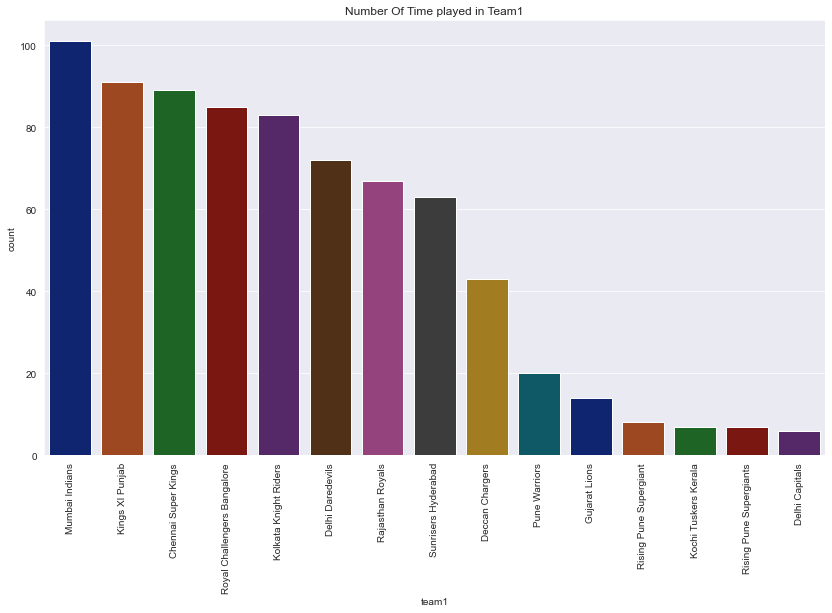

In [20]:
sns.countplot('team1',data=df,palette='dark',order=df['team1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('team1')
plt.title('Number Of Time played in Team1')
plt.show()

### Which team is mostly participate in Team2?

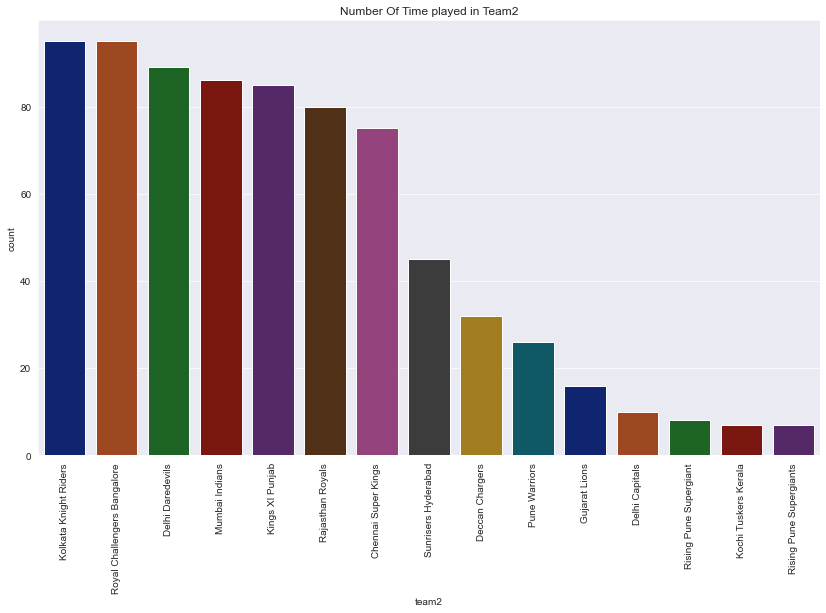

In [21]:
sns.countplot('team2',data=df,palette='dark',order=df['team2'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('team2')
plt.title('Number Of Time played in Team2')
plt.show()

### Which type of Result got Mostly in Team1 and Team2?

<AxesSubplot:xlabel='count', ylabel='team1'>

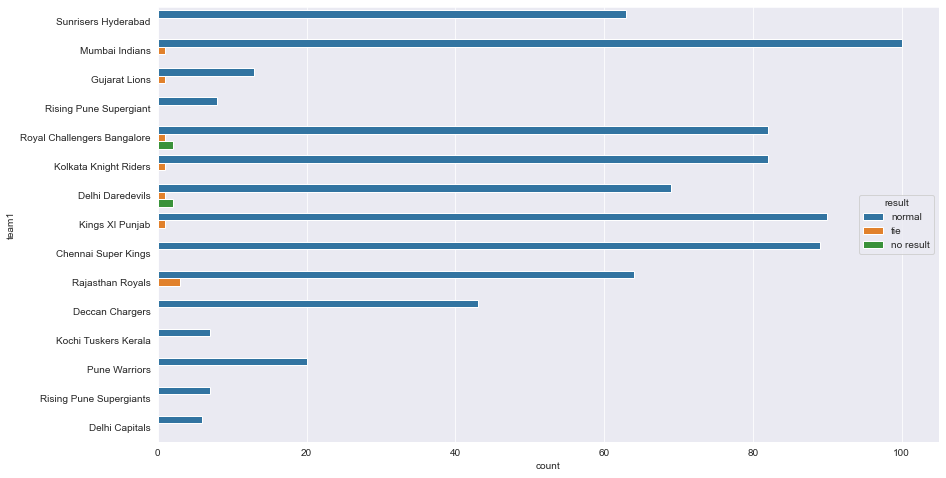

In [22]:
 sns.countplot(y="team1", hue="result", data = df)

<AxesSubplot:xlabel='count', ylabel='team2'>

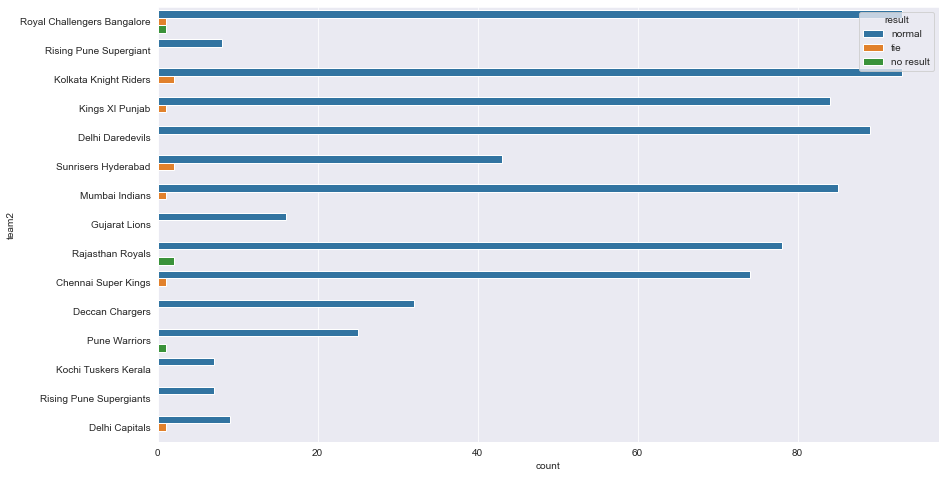

In [23]:
sns.countplot( data = df,y = 'team2',hue = 'result')

In [24]:
###which type of result mostly got by winning team

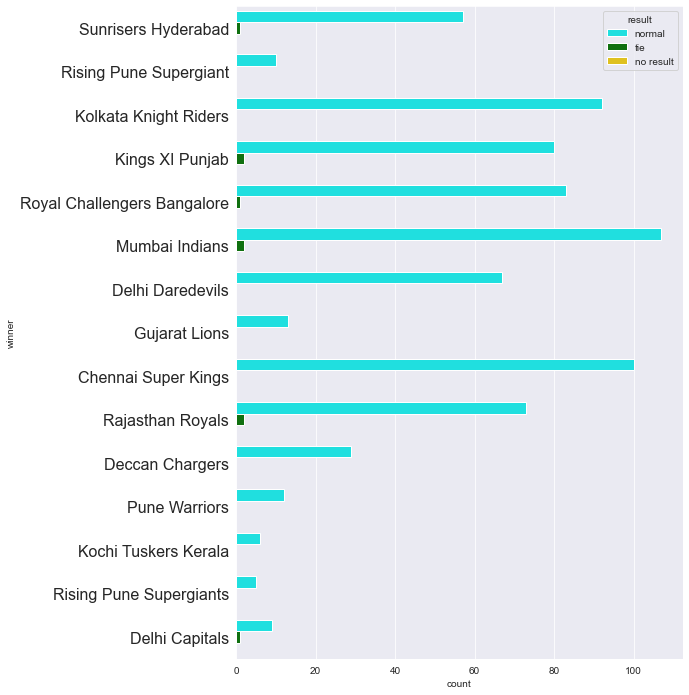

In [25]:
plt.figure(figsize=(8,12))
win = sns.countplot(y='winner',data=df, hue='result', palette=['cyan','green','gold'])
win.set
win = plt.yticks(rotation=0,fontsize=16)

### percentage of result 

In [26]:
pr=df['result'].value_counts()
pr.iplot(kind='bar',yTitle='Percentage', xTitle='Types of result', bargap=0.7,color='gold')

### the team with highest win

In [27]:
team = df.groupby('season')['winner'].value_counts()
team

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [31]:
year = 2008
win_season_mat = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in team.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series_mat = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_season_mat = win_season_mat.append(win_series_mat)
        year += 1

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [32]:
win_season_mat

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


<AxesSubplot:xlabel='team', ylabel='wins'>

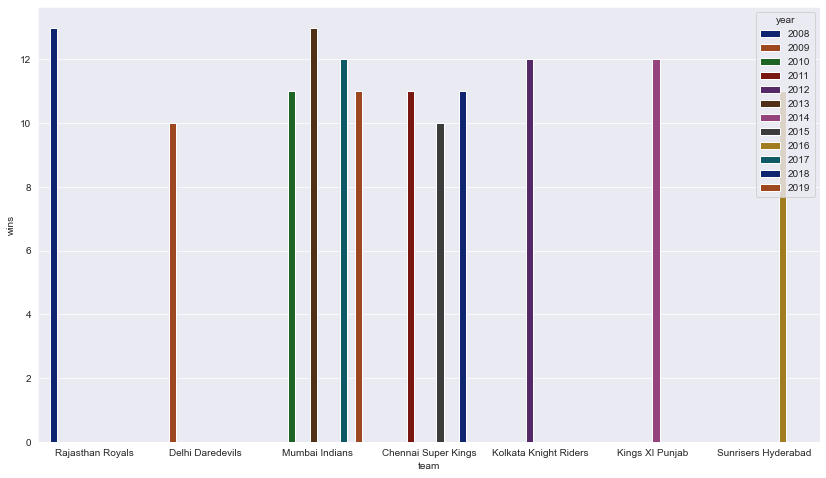

In [33]:
sns.barplot('team','wins',data=win_season_mat,hue='year',palette='dark')

### player Ranking

In [35]:
tp=df['player_of_match'].value_counts()[:10]
tp.iplot(kind='bar',xTitle='player', yTitle='No of matches',bargap=0.7,color='blue')


### Which city host match many time per season?

In [54]:
c_mat= df['city'].value_counts()
c_mat[:10].iplot(kind='area',theme='solar')

### The team that won the most number of toss

In [55]:
t_ser = df['toss_winner'].value_counts()

t_data = pd.DataFrame(columns=["team", "wins"])

for items in t_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    t_data = t_data.append(temp_df3, ignore_index=True)

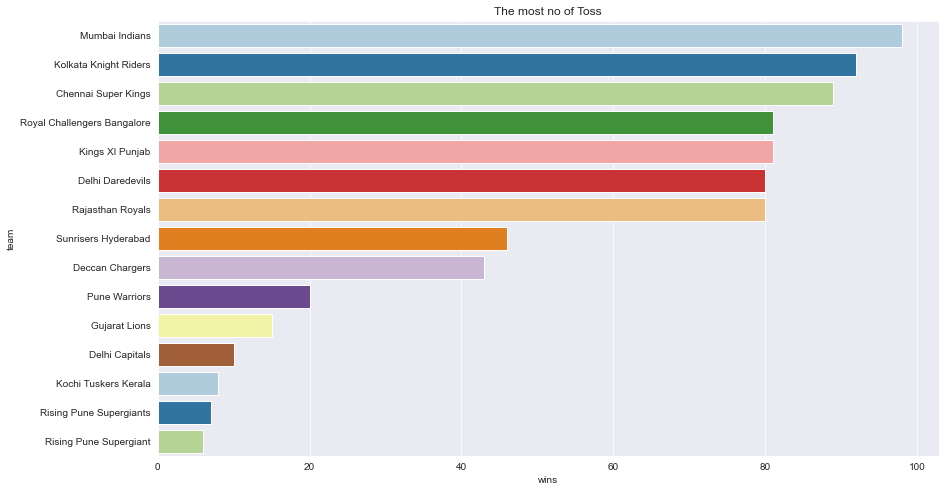

In [56]:
plt.title("The most no of Toss")
sns.barplot(x='wins', y='team', data=t_data, palette='Paired');

### Which team is highest run and wickets?

In [57]:
df['win_by_runs'].idxmax()

43

In [58]:
df['win_by_runs'].max()

146

In [59]:
df.iloc[43]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
year                           2017
month                             5
Name: 43, dtype: object

In [60]:
df['win_by_wickets'].max()

10

In [61]:
df['win_by_wickets'].idxmax()

2

In [62]:
df.iloc[2]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

### Summarize:
* 12-IPL Season till 2019 in 2013 76 days conduct matches
* In March and April  month host most of the IPL m
* Mumbai city host Most of match
* Eden Gardens Venue Mostly matches are hosted
* Gric Gayle is the most player of the match
* The best team and succesful IPL team is Mumbai Indians